In [ ]:
# TODO:
# extreme ones
#        örneğin percentage differenc en çok çıkan index 618se, gidip estimates içinden 618. hangisine denk geleceğine
#        dair bir script yazılabilir. estimates_trimmed -> estimates (ontology_term) -> descriptiveParams (asıl ismi)        

# across dataset
#        hangi deger aralıkları daha başarılı estimate yapabiliyoruz
#        hangi datasetlerde daha basarılıyız
#        basarılı olmadıımız yerler nereler
#        bir gride bunların nek adarını hatasız process edebildim, yuzde kacı hatalı, aldıgım hatalar ne gibi basabilirim

    
## NOTES FROM MEETING
#  which factors might be affecting in extreme points
#    correlating with #cells, #UMI, #reads per cells, 
#    how do those last 2 portion of fits look like
#    combine each of them with gamma fits and linear relation plots

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, facet_wrap, labs
import seaborn as sns
from sklearn.linear_model import LinearRegression

path = 'C:/Users/Cem/Documents/GitHub/Helmholtz-Workspace/Data-Descriptor/Cell-Level/scPower-wrapper/results/immune/estimates_trimmed.txt'

In [2]:
# Read data from the file and store it in a list
data = []
with open(path, 'r') as file:
    for line in file:
        if line.strip():  # Ignore empty lines
            parts = line.strip().split()  # split by space
            if len(parts) == 2:  # check if there are two parts
                counted = int(parts[0])
                estimated = int(parts[1].replace(',', ''))  # remove the comma from the second part
                data.append((counted, estimated))

In [3]:
# Fill a list with the data dictionaries and corresponding labels
labels = ['Complete', 'Subsampled75', 'Subsampled50', 'Subsampled25']
data_entries = []
for i in range(0, len(data), 4):
    for j in range(4):  # grouping in sets of 4
        if i + j < len(data):  # Check if the index is within the range of the data list
            label = labels[j]
            data_entries.append({'Counted': data[i + j][0], 'Estimated': data[i + j][1], 'Label': label})

In [4]:
# Create a DataFrame to hold the data using pd.concat
df = pd.DataFrame(data_entries)

# Convert to numeric and handle non-numeric data
df['Counted'] = pd.to_numeric(df['Counted'], errors='coerce')
df['Estimated'] = pd.to_numeric(df['Estimated'], errors='coerce')
df = df.dropna()

C:\Users\Cem\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


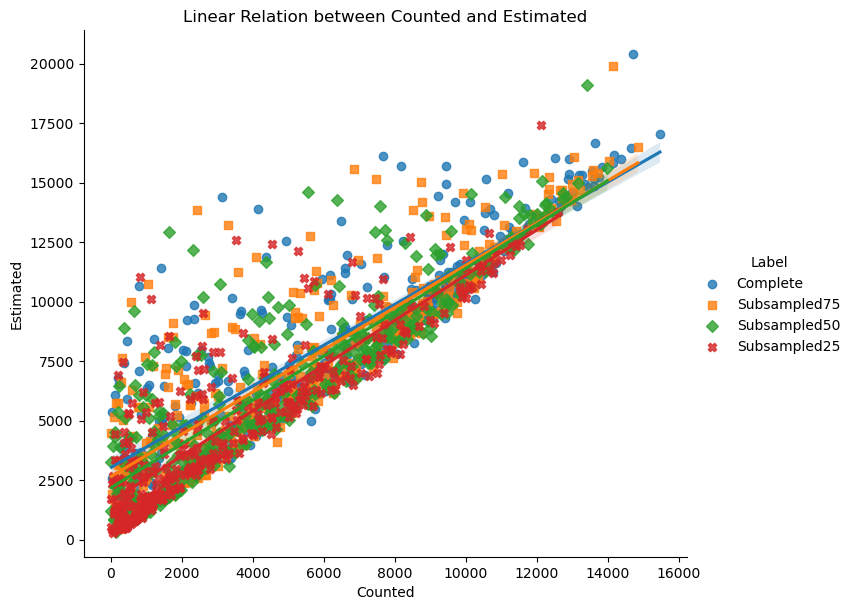

In [5]:
sns.lmplot(x='Counted', y='Estimated', data=df, hue='Label', markers=['o', 's', 'D', 'X'], height=6, aspect=1.2)
plt.title('Linear Relation between Counted and Estimated')
plt.show()

C:\Users\Cem\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
C:\Users\Cem\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


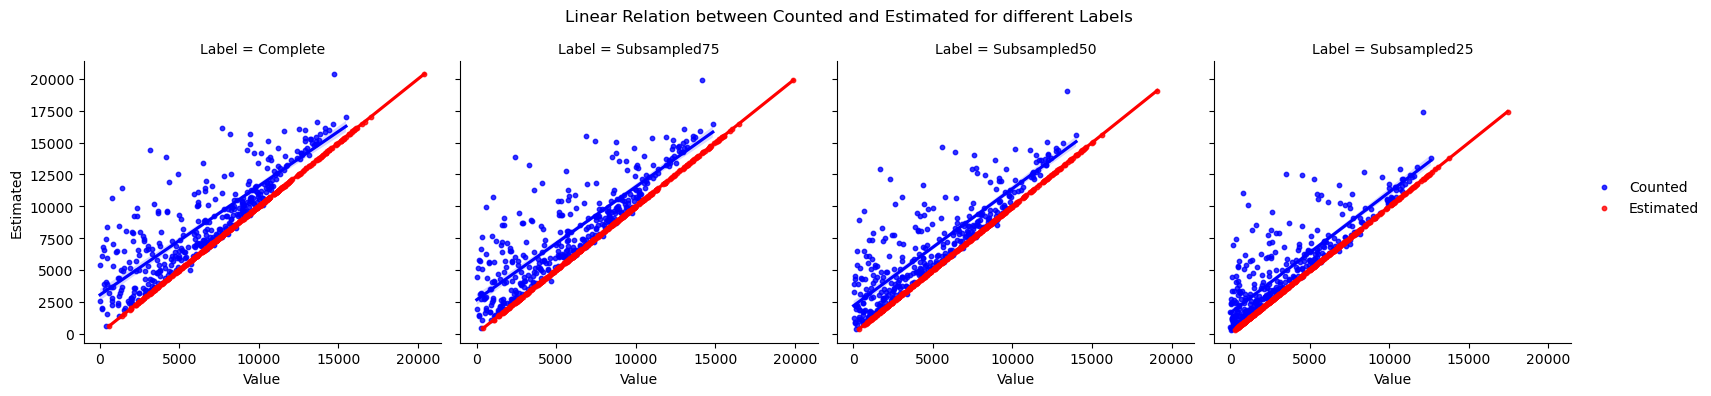

In [6]:
# blue line: linear regression line fitted to the scatter plot of 'Counted' against 'Estimated'
# red line: one to one relation between estimated and estimated which obviously will end up as perfectly diagonal line

# Create a grid of plots with the 'Label' as a separator and plot 'Counted' and 'Estimated' as different linear lines
g = sns.FacetGrid(df, col="Label", height=4, aspect=1)
g.map(sns.regplot, "Counted", "Estimated", color='b', label='Counted', scatter_kws={'s': 10})
g.map(sns.regplot, "Estimated", "Estimated", color='r', label='Estimated', scatter_kws={'s': 10})

# Adding legends and titles
g.add_legend()
g.set_axis_labels("Value", "Estimated")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Linear Relation between Counted and Estimated for different Labels')

plt.show()

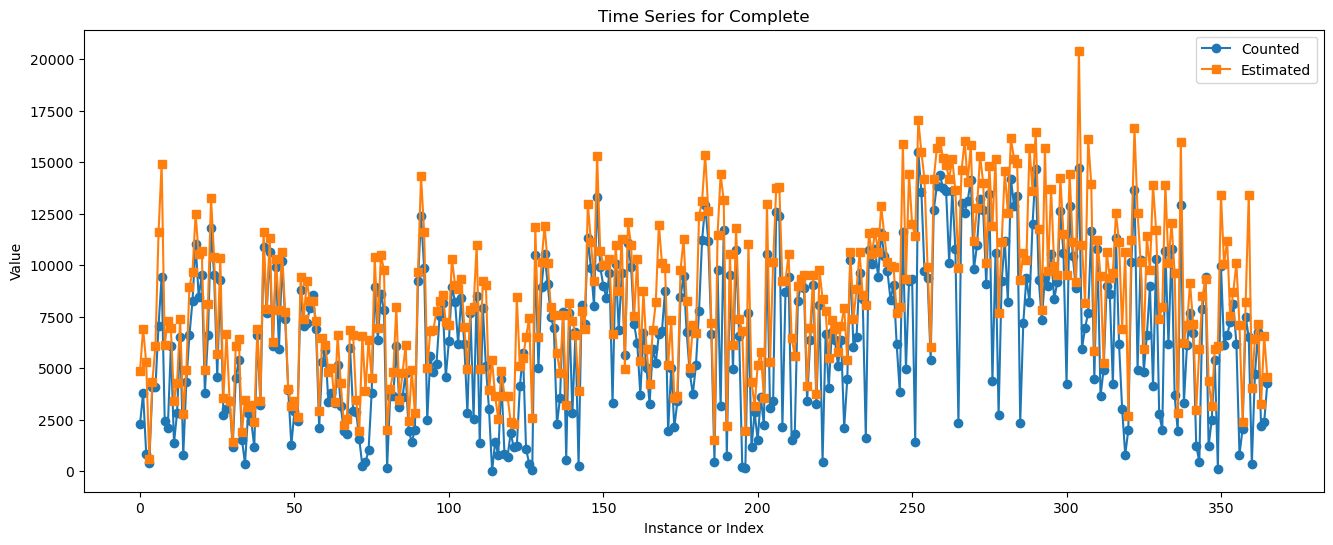

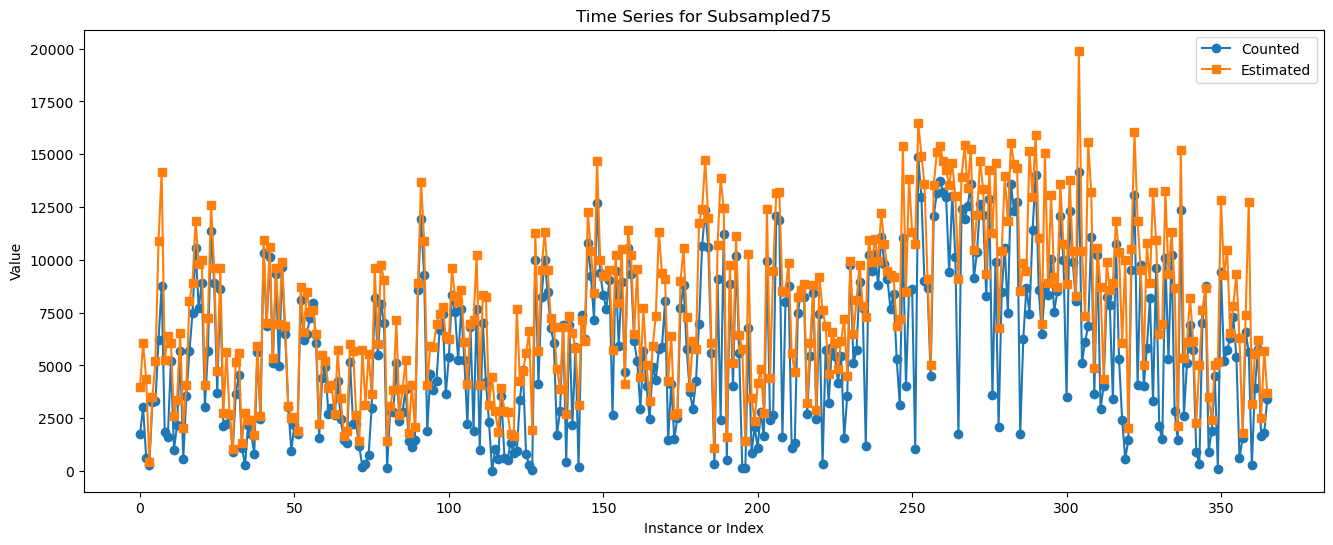

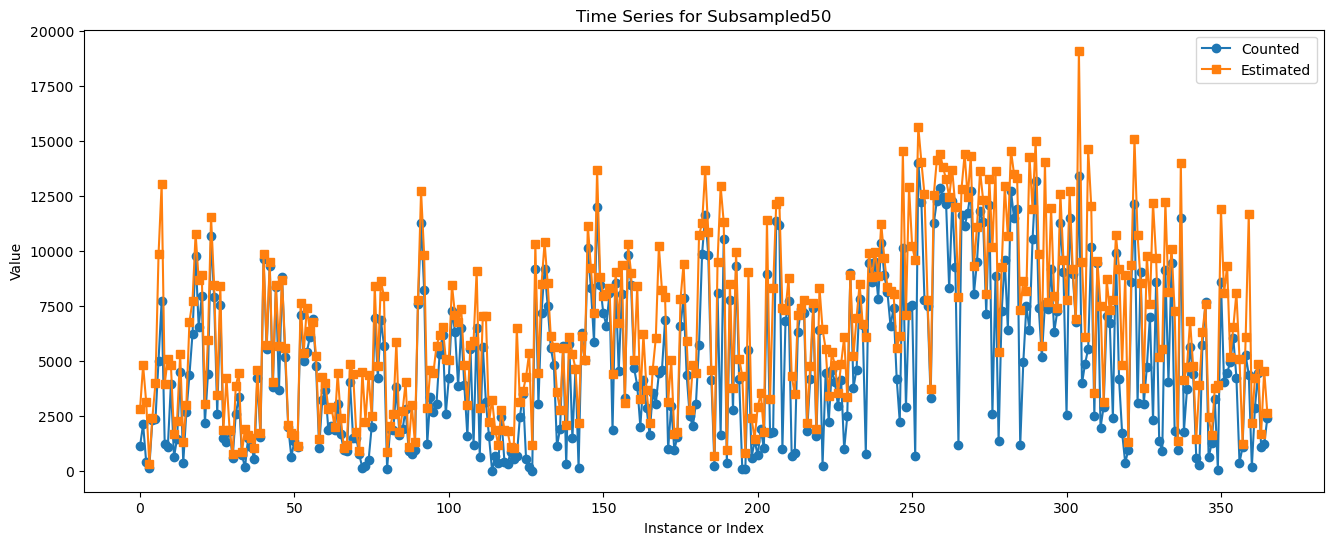

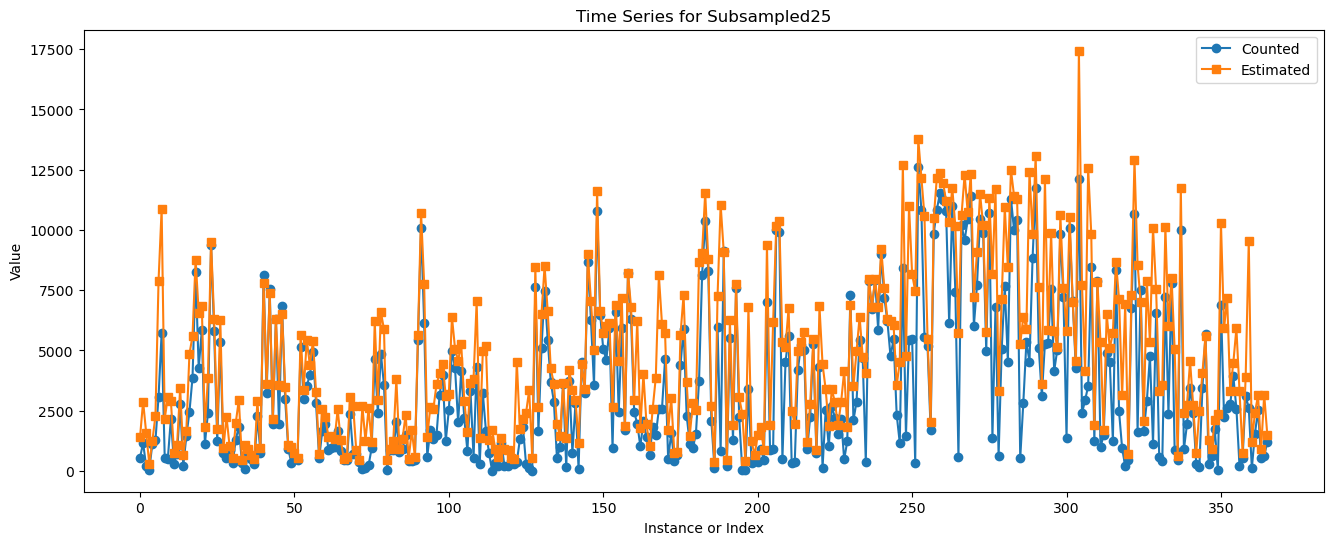

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = []

# Read from file
with open(path, 'r') as file:
    lines = file.readlines()

# Processing input data
for i, line in enumerate(lines):
    parts = line.replace(',', '').split()
    if len(parts) != 2:
        print(f"Unexpected number of values on line {i+1}: {line}")
        continue
    counted, estimated = map(int, parts)
    label = labels[i % 4]
    instance = i // 4
    data.append((instance, counted, estimated, label))

# Create DataFrame
df = pd.DataFrame(data, columns=['Time', 'Counted', 'Estimated', 'Label'])

# Compute the percentage difference
df['Percentage Difference'] = ((df['Estimated'] - df['Counted']) / df['Counted']) * 100


# Plotting
for label in labels:
    subset = df[df['Label'] == label]
    plt.figure(figsize=(16, 6))
    plt.plot(subset['Time'], subset['Counted'], label='Counted', marker='o')
    plt.plot(subset['Time'], subset['Estimated'], label='Estimated', marker='s')
    plt.title(f'Time Series for {label}')
    plt.xlabel('Instance or Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


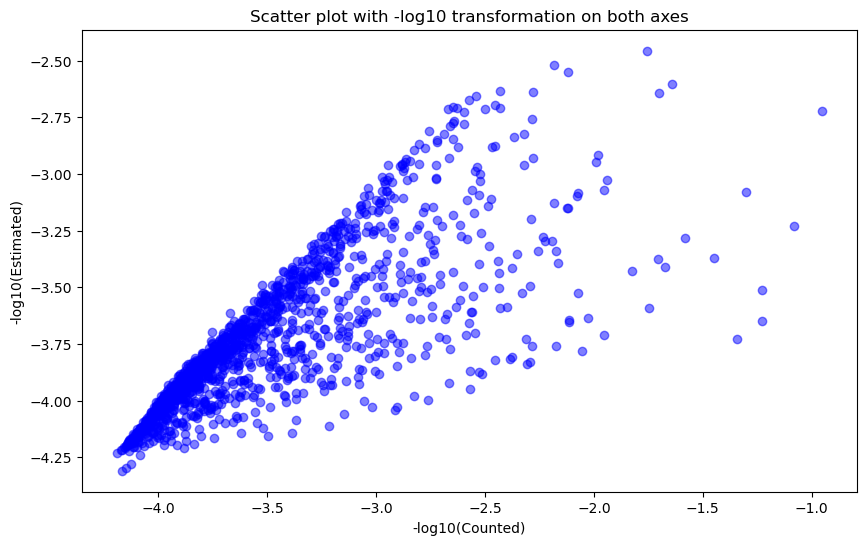

In [8]:
import numpy as np
# Define the transformation
def neg_log10(x):
    return -np.log10(x)

# Applying the transformation to the 'Counted' and 'Estimated' columns and plot
plt.figure(figsize=(10, 6))
plt.scatter(neg_log10(df['Counted']), neg_log10(df['Estimated']), c='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('-log10(Counted)')
plt.ylabel('-log10(Estimated)')
plt.title('Scatter plot with -log10 transformation on both axes')

plt.show()

C:\Users\Cem\anaconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
C:\Users\Cem\anaconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
C:\Users\Cem\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
C:\Users\Cem\AppData\Local\Temp\ipykernel_10616\2271464918.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Cem\AppData\Local\Temp\ipykernel_10616\2271464918.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator


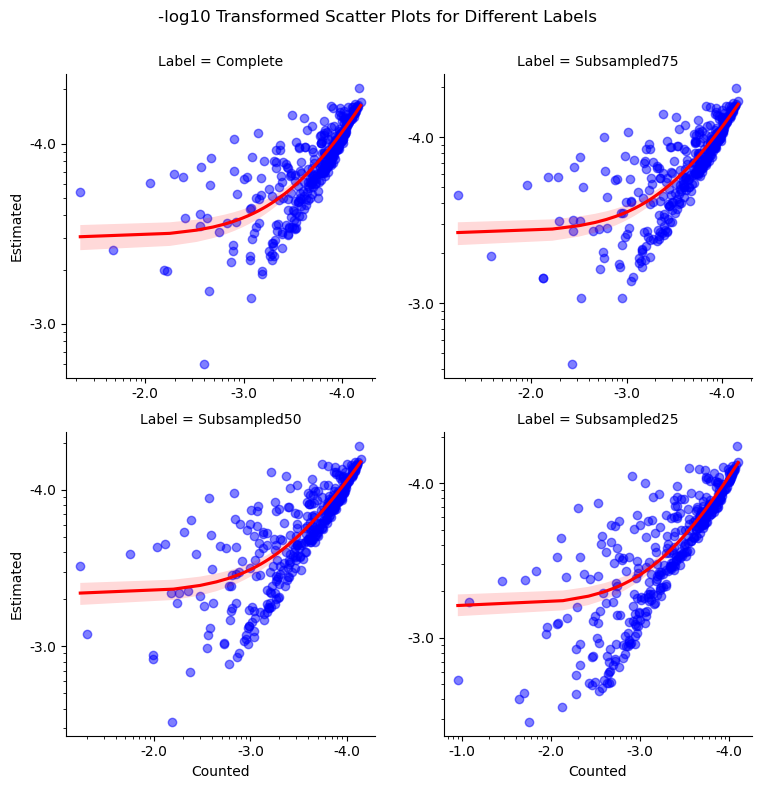

In [9]:
# linear regression line fitted to the scatter points of 'Counted' and 'Estimated' values

# Creating a lmplot with -log10 transformation on both axes for each Label
g = sns.lmplot(x='Counted', y='Estimated', data=df, col='Label', sharex=False, sharey=False,
               col_wrap=2, height=4, aspect=1, scatter_kws={'color': 'blue', 'alpha': 0.5},
               line_kws={'color': 'red'})

# Adjusting the axes to -log10 scale
g = g.set(xscale='log', yscale='log')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('-log10 Transformed Scatter Plots for Different Labels')

# Setting the ticks to represent -log10 values
for ax in g.axes.flatten():
    ax.set_xticklabels(neg_log10(ax.get_xticks()))
    ax.set_yticklabels(neg_log10(ax.get_yticks()))

plt.show()


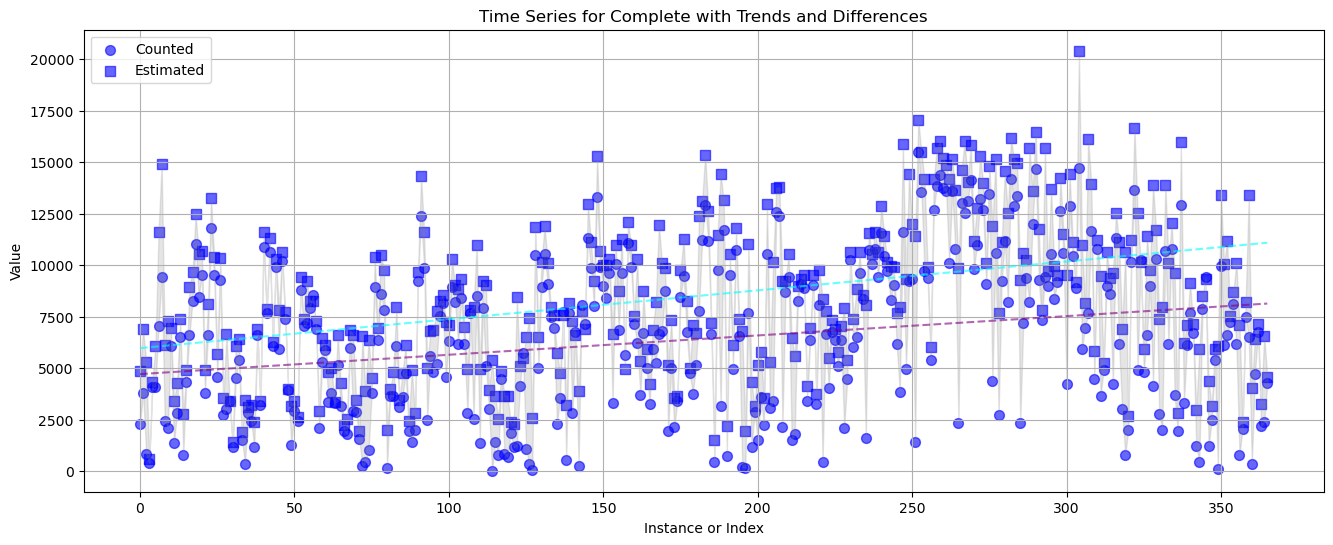

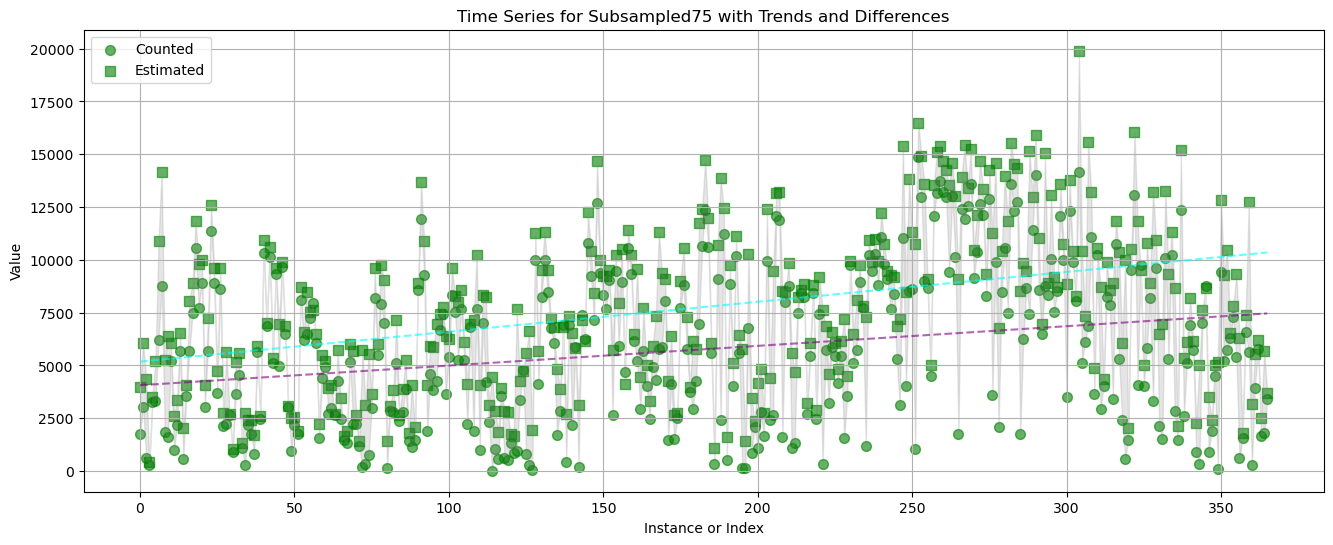

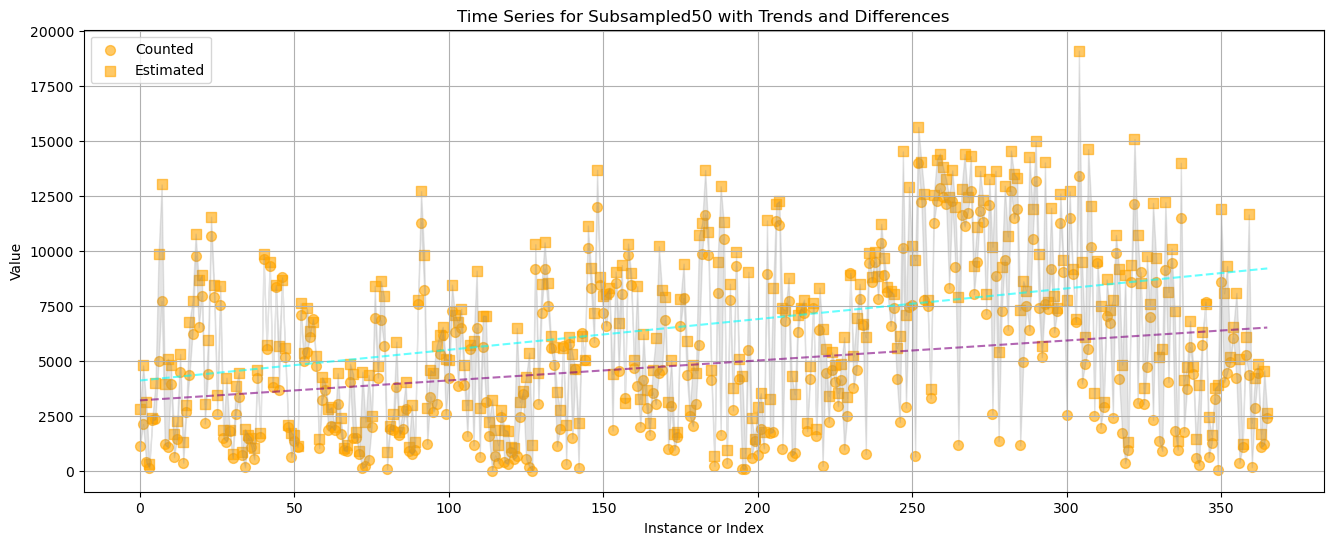

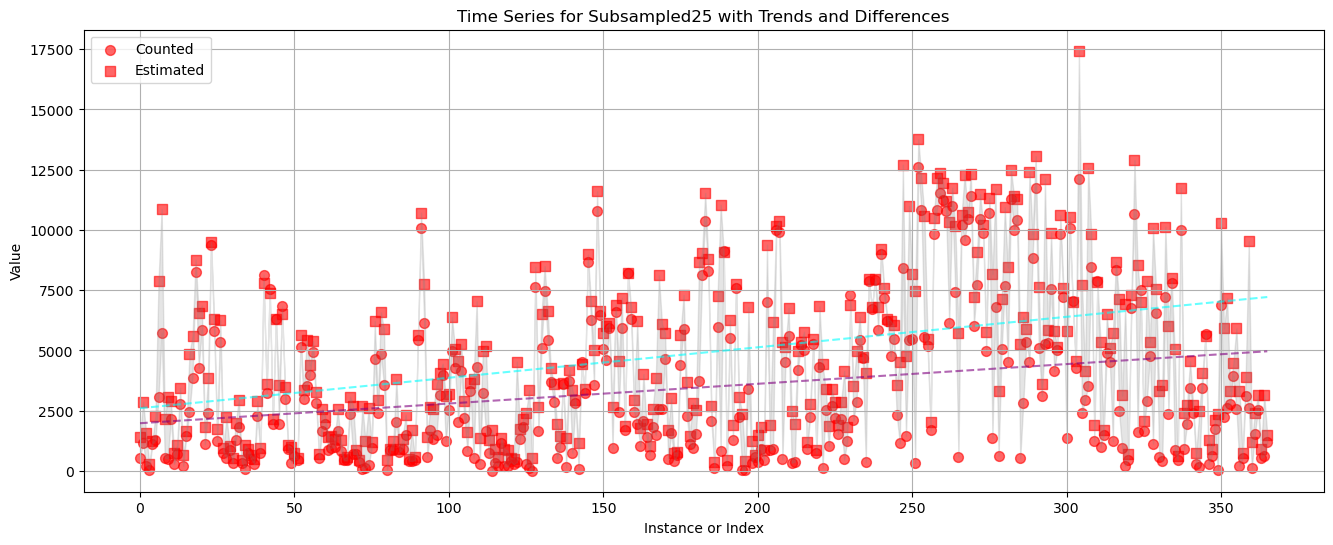

In [10]:
# purple dashed (predicted): linear regression lines fitted to 'Time' vs 'Counted'
# cyan dashed (estimated)  : linear regression lines fitted to 'Time' vs 'Estimated' 


# Define a color for each label
color_dict = {
    "Complete": "blue",
    "Subsampled75": "green",
    "Subsampled50": "orange",
    "Subsampled25": "red",
}

for label in labels:
    subset = df[df['Label'] == label]
    plt.figure(figsize=(16, 6))

    # Scatter Plot for clarity
    plt.scatter(subset['Time'], subset['Counted'], color=color_dict[label], label='Counted', marker='o', s=50, alpha=0.6)
    plt.scatter(subset['Time'], subset['Estimated'], color=color_dict[label], label='Estimated', marker='s', s=50, alpha=0.6)
    
    # Linear Regression and Line
    model_counted = LinearRegression().fit(subset[['Time']], subset['Counted'])
    predicted_counted = model_counted.predict(subset[['Time']])
    plt.plot(subset['Time'], predicted_counted, color='purple', linestyle='dashed', alpha=0.6)

    model_estimated = LinearRegression().fit(subset[['Time']], subset['Estimated'])
    predicted_estimated = model_estimated.predict(subset[['Time']])
    plt.plot(subset['Time'], predicted_estimated, color='cyan', linestyle='dashed', alpha=0.6)

    # Shading Between Lines
    plt.fill_between(subset['Time'], subset['Counted'], subset['Estimated'], color='gray', alpha=0.2)

    plt.title(f'Time Series for {label} with Trends and Differences')
    plt.xlabel('Instance or Index')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


In [11]:
# Assuming df is your DataFrame and it has a 'Label' column to group by
grouped = df.groupby('Label')
for name, group in grouped:
    print(f"{name} has {len(group)} data points")

Complete has 366 data points
Subsampled25 has 366 data points
Subsampled50 has 366 data points
Subsampled75 has 366 data points


In [12]:
number_complete_instances = len(df[(df['Label'] == 'Complete')])
number_complete_5percent  = len(df[(df['Label'] == 'Complete') & (df['Percentage Difference'] < 5)])
print(f"number of complete instances {number_complete_instances}")
print(f"number of complete instances with deviation less than 5%: {number_complete_5percent}/{number_complete_instances} = {(number_complete_5percent/number_complete_instances)*100:.2f}%")

number of complete instances 366
number of complete instances with deviation less than 5%: 32/366 = 8.74%


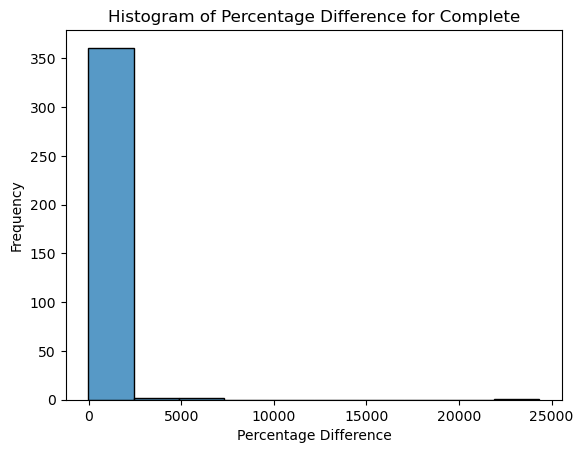

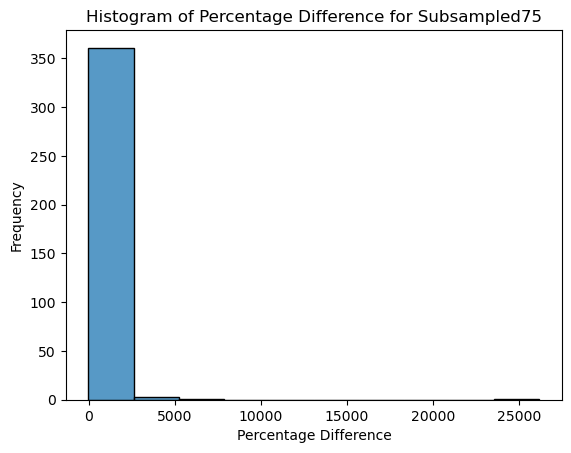

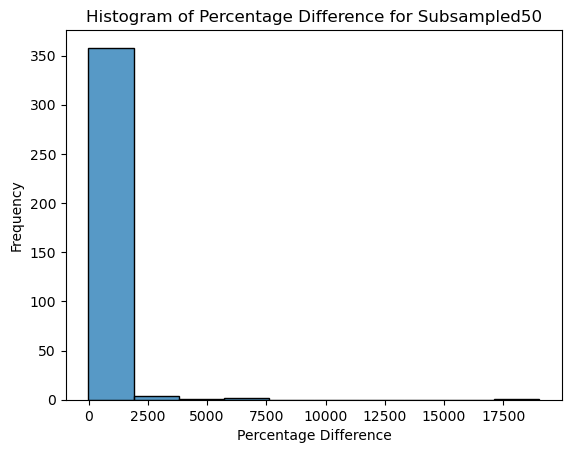

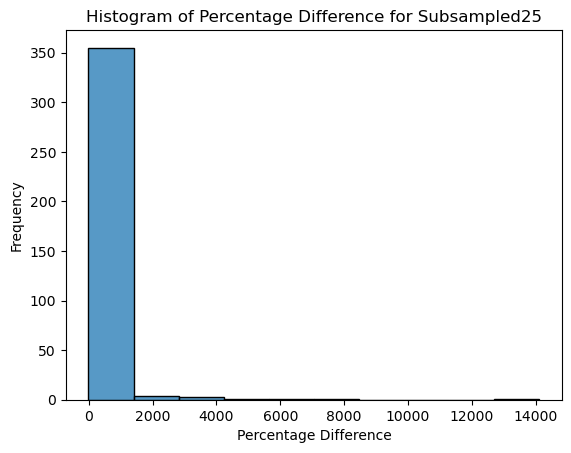

In [13]:
import seaborn as sns

for label in labels:
    subset = df[df['Label'] == label]
    sns.histplot(subset['Percentage Difference'], bins=10, kde=False)
    plt.title(f'Histogram of Percentage Difference for {label}')
    plt.xlabel('Percentage Difference')
    plt.ylabel('Frequency')
    plt.show()


## UMI Correlation başı

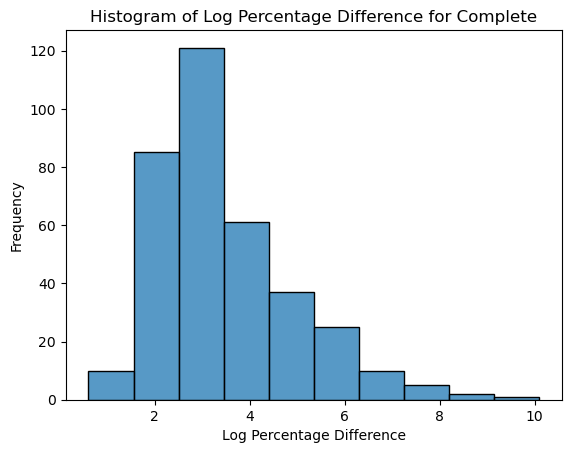

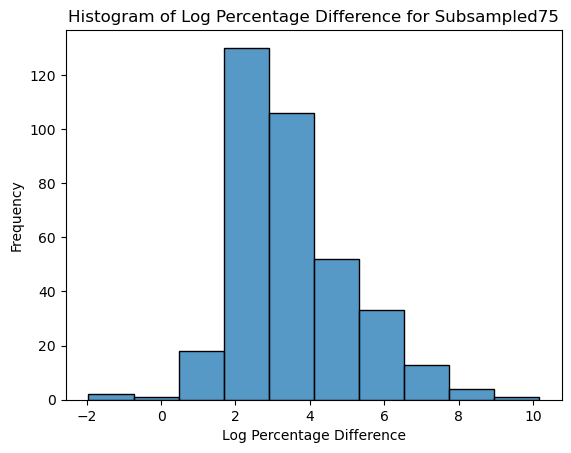

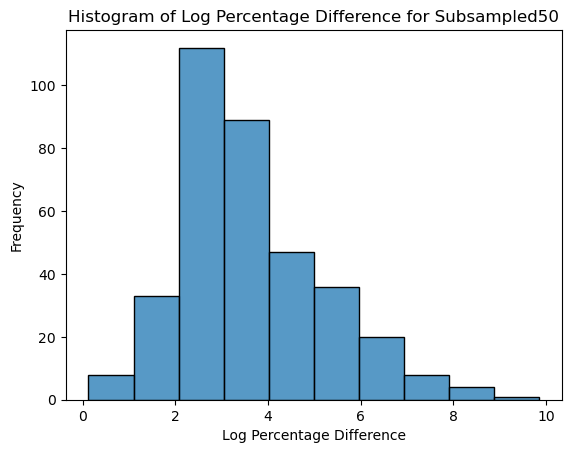

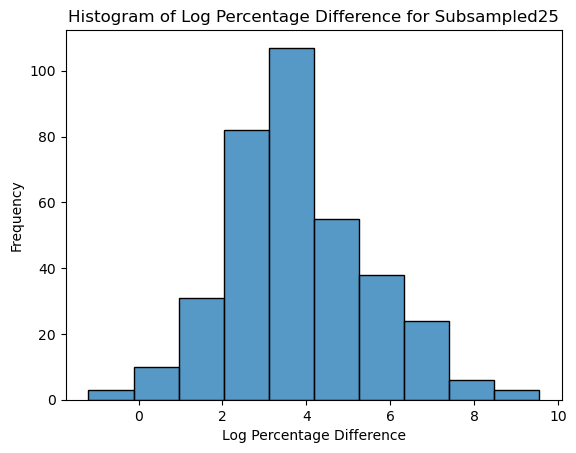

In [14]:
import seaborn as sns
import numpy as np

# Filter out values that are exactly 0 before applying log transformation
df['Log Percentage Difference'] = df['Percentage Difference'].apply(lambda x: np.log(x + 1) if x != 0 else 0)

for label in labels:
    subset = df[df['Label'] == label]
    sns.histplot(subset['Log Percentage Difference'], bins=10, kde=False)
    plt.title(f'Histogram of Log Percentage Difference for {label}')
    plt.xlabel('Log Percentage Difference')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
complete_diff     = df[(df['Label'] == 'Complete')     & ((df['Log Percentage Difference'] > 8))]
subsampled75_diff = df[(df['Label'] == 'Subsampled75') & ((df['Log Percentage Difference'] > 8) | (df['Log Percentage Difference'] <= -2))]
subsampled50_diff = df[(df['Label'] == 'Subsampled50') & ((df['Log Percentage Difference'] > 8))]
subsampled25_diff = df[(df['Label'] == 'Subsampled25') & ((df['Log Percentage Difference'] > 8))]

concat_diff = pd.concat([complete_diff, subsampled75_diff, subsampled50_diff, subsampled25_diff])

In [17]:
concat_diff['Discrepancy'] = abs(concat_diff['Counted'] - concat_diff['Estimated'])

print(len(concat_diff))
concat_diff

20


,Time,Counted,Estimated,Label,Percentage Difference,Log Percentage Difference,Discrepancy
456,114,22,5376,Complete,24336.363636,10.099768,5354
508,127,47,2583,Complete,5395.744681,8.593551,2536
780,195,197,6785,Complete,3344.162437,8.115271,6588
1396,349,113,6074,Complete,5275.221239,8.570965,5961
457,114,17,4470,Subsampled75,26194.117647,10.173328,4453
509,127,38,1927,Subsampled75,4971.052632,8.511588,1889
781,195,150,5757,Subsampled75,3738.000000,8.226573,5607
1397,349,90,5143,Subsampled75,5614.444444,8.633276,5053
290,72,130,4513,Subsampled50,3371.538462,8.123421,4383
458,114,17,3251,Subsampled50,19023.529412,9.853484,3234


In [ ]:
# dropping negative percentage differences 
# where they can not be considered as extreme points

#concat_diff = concat_diff.drop(index = [660, 981, 1591])

print(len(concat_diff['Estimated']))
print(concat_diff)

In [18]:
umi_counts = [5938.500, 2792.4935, 2688.2605, 7712.153, 4453.978, 2094.4675, 2016.3103, 5784.264, 2796.967, 2969.478, 1396.5455, 1344.4176, 3856.361, 1398.479, 1484.744, 698.2468, 672.1686, 1052.602, 2561.113, 1928.153]
print(len(umi_counts))

20


In [19]:
cell_counts = [90,77,261,72,90,77,261,72,211,90,77,261,72,211,90,77,261,246,302,72]
print(len(cell_counts))

20


In [20]:
concat_diff['UMI_Counts'] = umi_counts
concat_diff['Number_of_Cells'] = cell_counts
concat_diff = concat_diff.drop('Time', axis=1)

print(concat_diff)

      Counted  Estimated         Label  Percentage Difference  \
456        22       5376      Complete           24336.363636   
508        47       2583      Complete            5395.744681   
780       197       6785      Complete            3344.162437   
1396      113       6074      Complete            5275.221239   
457        17       4470  Subsampled75           26194.117647   
509        38       1927  Subsampled75            4971.052632   
781       150       5757  Subsampled75            3738.000000   
1397       90       5143  Subsampled75            5614.444444   
290       130       4513  Subsampled50            3371.538462   
458        17       3251  Subsampled50           19023.529412   
510        20       1198  Subsampled50            5890.000000   
782       107       4320  Subsampled50            3937.383178   
1398       56       3913  Subsampled50            6887.500000   
291        67       2692  Subsampled25            3917.910448   
459        12       1705 

In [21]:
## Summary statistics for "complete", "subsampled75", "subsampled50" and "subsampled25" 

summary_stats = {
    "Counted": ["mean", "std", "min", "max"],
    "Estimated": ["mean", "std", "min", "max"],
    "Percentage Difference": ["mean", "std", "min", "max"],
    "Log Percentage Difference" : ["mean", "std", "min", "max"],
    "Discrepancy" : ["mean", "std", "min", "max"],
    "UMI_Counts" : ["mean", "std", "min", "max"],
    "Number_of_Cells" : ["mean", "std", "min", "max"],
}

# Group by 'Label' and calculate chosen summary statistics
grouped_summary = concat_diff.groupby('Label').agg(summary_stats)

# Use a prettier display format
pd.set_option('display.float_format', '{:.2f}'.format)

print(grouped_summary)

             Counted                Estimated                      \
                mean   std min  max      mean     std   min   max   
Label                                                               
Complete       94.75 78.23  22  197   5204.50 1839.90  2583  6785   
Subsampled25   71.29 70.98   9  202   2999.14 2085.35   530  6921   
Subsampled50   66.00 50.98  17  130   3439.00 1342.73  1198  4513   
Subsampled75   73.75 59.38  17  150   4324.25 1682.38  1927  5757   

             Percentage Difference           ... Discrepancy       UMI_Counts  \
                              mean      std  ...         min   max       mean   
Label                                        ...                                
Complete                   9587.87  9877.16  ...        2536  6588    4782.85   
Subsampled25               6182.20  3905.04  ...         521  6719    1399.36   
Subsampled50               7821.99  6422.17  ...        1178  4383    2472.75   
Subsampled75              1012

### concatanated results

C:\Users\Cem\AppData\Local\Temp\ipykernel_10616\2716007170.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


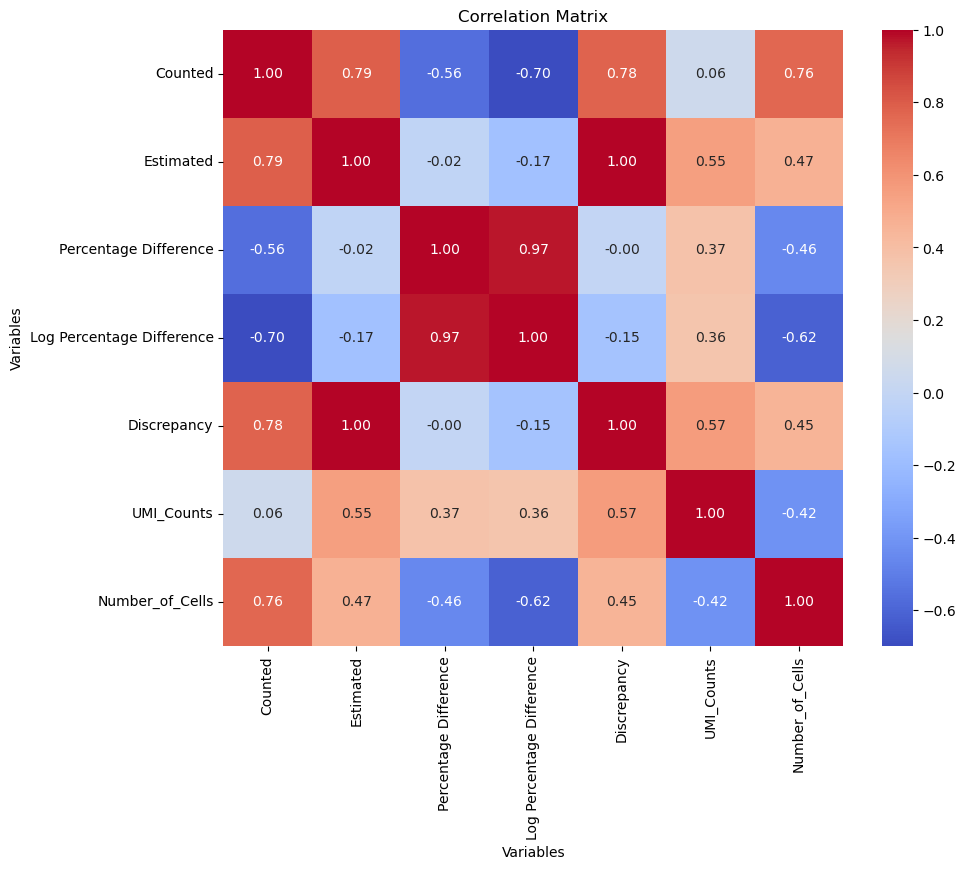

In [22]:
# Calculate the correlation matrix
corr_matrix = concat_diff.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels for clarity
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()

In [23]:
from scipy.stats import pearsonr

correlation_counted, _     = pearsonr(concat_diff['Counted'], umi_counts)
correlation_estimated, _   = pearsonr(concat_diff['Estimated'], umi_counts)
correlation_percdiff, _    = pearsonr(concat_diff['Percentage Difference'], umi_counts)
correlation_logpercdiff, _ = pearsonr(concat_diff['Log Percentage Difference'], umi_counts)
correlation_discrepancy, _ = pearsonr(concat_diff['Discrepancy'], umi_counts)

In [24]:
print(f"Counted: {correlation_counted:.2f}")
print(f"Estimated: {correlation_estimated:.2f}")
print(f"Percentage Difference: {correlation_percdiff:.2f}")
print(f"Log Percentage Difference: {correlation_logpercdiff:.2f}")
print(f"Discrepancy: {correlation_discrepancy:.2f}")

Counted: 0.06
Estimated: 0.55
Percentage Difference: 0.37
Log Percentage Difference: 0.36
Discrepancy: 0.57


In [25]:
from scipy.stats import pearsonr

correlation2_counted, _     = pearsonr(concat_diff['Counted'], cell_counts)
correlation2_estimated, _   = pearsonr(concat_diff['Estimated'], cell_counts)
correlation2_percdiff, _    = pearsonr(concat_diff['Percentage Difference'], cell_counts)
correlation2_logpercdiff, _ = pearsonr(concat_diff['Log Percentage Difference'], cell_counts)
correlation2_discrepancy, _ = pearsonr(concat_diff['Discrepancy'], cell_counts)

In [26]:
print(f"Counted: {correlation2_counted:.2f}")
print(f"Estimated: {correlation2_estimated:.2f}")
print(f"Percentage Difference: {correlation2_percdiff:.2f}")
print(f"Log Percentage Difference: {correlation2_logpercdiff:.2f}")
print(f"Discrepancy: {correlation2_discrepancy:.2f}")

Counted: 0.76
Estimated: 0.47
Percentage Difference: -0.46
Log Percentage Difference: -0.62
Discrepancy: 0.45


## UMI correlation son

In [ ]:
extreme_point = 40

for label in labels:
    subset = df[df['Label'] == label]
    
    plt.figure(figsize=(16, 6))
    
    # Plot standard points
    plt.plot(subset['Time'], subset['Counted'], label='Counted', marker='o', color='gray')
    plt.plot(subset['Time'], subset['Estimated'], label='Estimated', marker='s', color='gray')
    
    # Highlight extreme points with > 40% difference
    extreme_points = subset[subset['Percentage Difference'].abs() > extreme_point]
    plt.scatter(extreme_points['Time'], extreme_points['Counted'], color='red', label='Extreme Counted', zorder=5)
    plt.scatter(extreme_points['Time'], extreme_points['Estimated'], color='red', label='Extreme Estimated', zorder=5)
    
    plt.title(f'Time Series for {label}')
    plt.xlabel('Instance or Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [ ]:
# Adjust display settings
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Ensure the display isn't truncated in width
pd.set_option('display.max_colwidth', None)  # Display full content of each column

# Your filtering logic
filtered_df = df[(df['Label'] == 'Complete') & (df['Percentage Difference'] > 40)]
filtered_df.sort_values(by='Percentage Difference', ascending=False)

## Across Datasets

In [ ]:
import pandas as pd
import os

data_folder = 'C:/Users/Cem/Documents/GitHub/Helmholtz-Workspace/Data-Descriptor/Cell-Level/scPower-wrapper/results/all_estimates'  
file_names = [f for f in os.listdir(data_folder) if f.endswith('.txt')]

all_data = []

for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    for i, line in enumerate(lines):
        parts = line.replace(',', '').split()
        if len(parts) != 2:
            print(f"Unexpected number of values in {file_name} on line {i+1}: {line}")
            continue
        counted, estimated = map(int, parts)
        label = labels[i % 4]
        instance = i // 4
        all_data.append((instance, counted, estimated, label, file_name))  # Also store the file name for reference

# Create a combined dataframe
df = pd.DataFrame(all_data, columns=['Time', 'Counted', 'Estimated', 'Label', 'Source'])

# Compute the percentage difference for the combined dataframe
df['Percentage Difference'] = ((df['Estimated'] - df['Counted']) / df['Counted']) * 100

# Get summary statistics
summary = df.describe()

print(summary)


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

directory_path = 'C:/Users/Cem/Documents/GitHub/Helmholtz-Workspace/Data-Descriptor/Cell-Level/scPower-wrapper/results/all_estimates' 

file_list = [f for f in os.listdir(directory_path) if f.endswith('.txt')]

combined_df = pd.DataFrame()

for file in file_list:
    file_path = os.path.join(directory_path, file)
    
    # Extracting the Counted and Estimated values from the files
    with open(file_path, 'r') as f:
        lines = f.readlines()
        
    counted_values = []
    estimated_values = []
    for line in lines:
        counted, estimated = line.strip().split()
        counted_values.append(int(counted))
        estimated_values.append(int(estimated.strip(',')))
    
    temp_df = pd.DataFrame({
        'Counted': counted_values,
        'Estimated': estimated_values,
    })
    
    temp_df['File'] = file
    temp_df['Percentage Difference'] = ((temp_df['Estimated'] - temp_df['Counted']) / temp_df['Counted']) * 100
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Once the combined_df is correctly constructed, run the summary and boxplot again:

# Summary statistics
summary_stats = combined_df.groupby('File')['Percentage Difference'].describe()

print(summary_stats)

# Boxplot to see the distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='File', y='Percentage Difference')
plt.xticks(rotation=90)
plt.ylabel('Percentage Difference (%)')
plt.title('Distribution of Percentage Differences across Files')
plt.show()


In [ ]:
sns.swarmplot(data=combined_df, x='File', y='Percentage Difference', palette="viridis")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the Boxen plot
sns.boxenplot(data=combined_df, x='File', y='Percentage Difference', palette="viridis")
plt.xticks(rotation=90)
# Show the plot
plt.show()